In [33]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [34]:
os.path.exists("Project/tests/test_1/generate_trajectory.json")

True

In [35]:
f = open("Project/tests/test_4/generate_trajectory.json")
data = json.load(f)

In [36]:
spirals = [np.array([[d["x"], d["y"]] for d in data["spirals"][i]]) for i in range(len(data["spirals"]))]

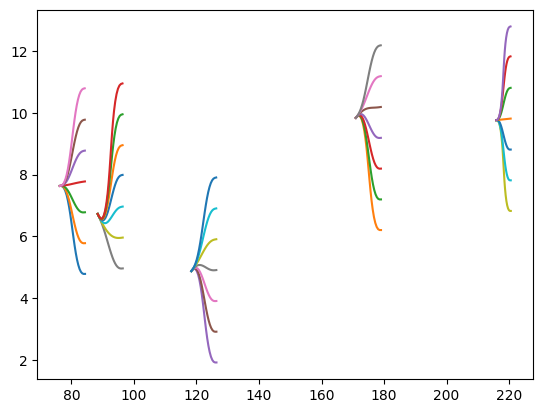

In [38]:
for i in range(5):
    f = open(f"Project/tests/test_{i}/generate_trajectory.json")
    data = json.load(f)
    spirals = [np.array([[d["x"], d["y"]] for d in data["spirals"][j]]) for j in range(len(data["spirals"]))]
    for spiral in spirals:
        plt.plot(spiral[:, 0], spiral[:, 1])

In [43]:
from Project.planners.VelocityProfileGenerator import VelocityProfileGenerator
from Project.planners.Structures import State, PathPoint, Maneuver, TrajectoryPoint
from Project.tests import TestParams as p

In [44]:
velocity_profile_generator = VelocityProfileGenerator()
velocity_profile_generator.setup(p.P_TIME_GAP, p.P_MAX_ACCEL, p.P_SLOW_SPEED)

In [46]:
def parse_trajectory_from_file(path):
    data = None

    with open(path) as file:
        data = json.load(file)

    spirals = []
    for s in data["spirals"]:
        spiral = []
        for point in s:
            path_point = PathPoint(**point)
            spiral.append(path_point)
        spirals.append(spiral)

    trajectories = []

    for t in data["result"]:
        trajectory = []
        for point in t:
            trajec_point = TrajectoryPoint.from_dict(point)
            trajectory.append(trajec_point)
        trajectories.append(trajectory)

    desired_speed = data["desired_speed"]
    ego_state = State.from_dict(data["ego_state"])
    behaviour = Maneuver(data["behaviour"])

    return spirals, desired_speed, ego_state, behaviour, trajectories

In [90]:
spirals, desired_speed, ego_state, behaviour, trajectories = parse_trajectory_from_file("Project/tests/test_3/generate_trajectory.json")

calculated_trajectories = []
for i, (spiral, trajectory) in enumerate(zip(spirals, trajectories)):
    print(f"\tTrajectory {i}", end = " ")
    trajectory_calculated = velocity_profile_generator.generate_trajectory(
        spiral,
        desired_speed,
        ego_state,
        None,
        behaviour
    )
    calculated_trajectories.append(trajectory_calculated)

	Trajectory 0 	Trajectory 1 	Trajectory 2 	Trajectory 3 	Trajectory 4 	Trajectory 5 	Trajectory 6 

In [99]:
def plot_trajectory(trajectory, color = "b", alpha = 1.0):
    x = [point.path_point.x for point in trajectory]
    y = [point.path_point.y for point in trajectory]
    plt.plot(x, y, color, alpha = alpha)

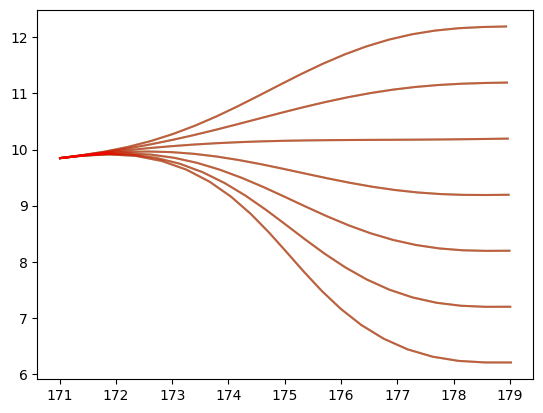

In [100]:
plt.figure()

for trajectory in calculated_trajectories:
    plot_trajectory(trajectory, "g", 0.5)

for trajectory in trajectories:
    plot_trajectory(trajectory, "r", 0.5)

In [106]:
import pandas as pd

In [126]:
def get_trajectory_df(traj):
    df = pd.DataFrame(columns = traj[0].to_dict().keys())

    for i in range(0, len(traj)):
        df.loc[len(df)] = list(traj[i].to_dict().values())

    return df

,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,171.013853,9.846795,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,3.0,0.0,0.000000
1,171.430767,9.891838,0.0,0.090533,-1.390803e-01,0.466001,-0.250386,0.0,3.0,0.0,0.155311
2,171.895813,9.913322,0.0,0.001799,-2.349472e-01,0.932002,-0.162763,0.0,3.0,0.0,0.310492
3,172.360069,9.885278,0.0,-0.122466,-2.923630e-01,1.398003,-0.085359,0.0,3.0,0.0,0.465526
4,172.816164,9.795688,0.0,-0.265451,-3.160898e-01,1.864004,-0.018175,0.0,3.0,0.0,0.620463
5,173.254453,9.641137,0.0,-0.412569,-3.108899e-01,2.330005,0.038789,0.0,3.0,0.0,0.775376
6,173.666366,9.425638,0.0,-0.551448,-2.815255e-01,2.796006,0.085535,0.0,3.0,0.0,0.930336
7,174.047178,9.158521,0.0,-0.671937,-2.327589e-01,3.262007,0.122061,0.0,3.0,0.0,1.085388
8,174.397432,8.851930,0.0,-0.766105,-1.693522e-01,3.728008,0.148367,0.0,3.0,0.0,1.240549
9,174.722885,8.518721,0.0,-0.828240,-9.606768e-02,4.194009,0.164455,0.0,3.0,0.0,1.395808


In [127]:
df = pd.DataFrame(columns = trajectories[0][0].to_dict().keys())

for i in range(0, len(trajectories[0])):
    df.loc[len(df)] = list(trajectories[0][i].to_dict().values())
display(df)

,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,171.013853,9.846795,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,3.0,0.0,0.000000e+00
1,171.430767,9.891838,0.0,0.090533,-1.390803e-01,0.466001,-0.250386,0.0,3.0,0.0,6.175696e-08
2,171.895813,9.913322,0.0,0.001799,-2.349472e-01,0.932002,-0.162763,0.0,3.0,0.0,1.551809e-01
3,172.360069,9.885278,0.0,-0.122466,-2.923630e-01,1.398003,-0.085359,0.0,3.0,0.0,3.102148e-01
4,172.816164,9.795688,0.0,-0.265451,-3.160898e-01,1.864004,-0.018175,0.0,3.0,0.0,4.651517e-01
5,173.254453,9.641137,0.0,-0.412569,-3.108899e-01,2.330005,0.038789,0.0,3.0,0.0,6.200653e-01
6,173.666366,9.425638,0.0,-0.551448,-2.815255e-01,2.796006,0.085535,0.0,3.0,0.0,7.750247e-01
7,174.047178,9.158521,0.0,-0.671937,-2.327589e-01,3.262007,0.122061,0.0,3.0,0.0,9.300766e-01
8,174.397432,8.851930,0.0,-0.766105,-1.693522e-01,3.728008,0.148367,0.0,3.0,0.0,1.085238e+00
9,174.722885,8.518721,0.0,-0.828240,-9.606768e-02,4.194009,0.164455,0.0,3.0,0.0,1.240497e+00
